In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
train_set = pd.read_csv(r"c:\Users\Siddharth Sharma\OneDrive\Desktop\UnRar\titanic\train.csv")
print(train_set)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
test_set = pd.read_csv(r"c:\Users\Siddharth Sharma\OneDrive\Desktop\UnRar\titanic\test.csv")
print(test_set)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


<Axes: xlabel='Pclass'>

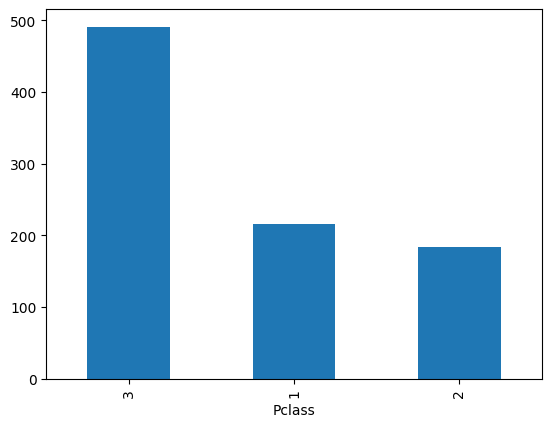

In [5]:
frequency_of_class = train_set['Pclass'].value_counts()
print(frequency_of_class)
frequency_of_class.plot(kind= 'bar')


Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived'>

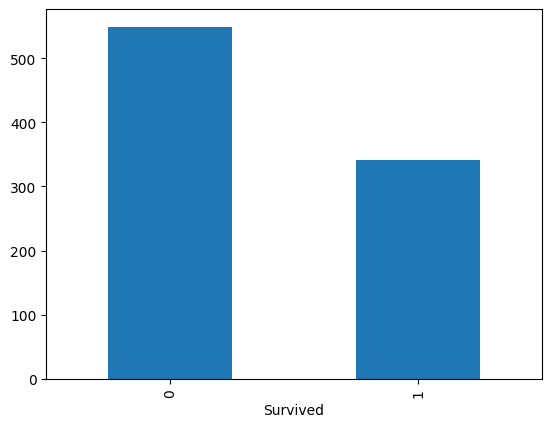

In [6]:
no_of_survived = train_set['Survived'].value_counts()
print(no_of_survived)
no_of_survived.plot(kind = 'bar')

Sex
male      577
female    314
Name: count, dtype: int64


<Axes: xlabel='Sex'>

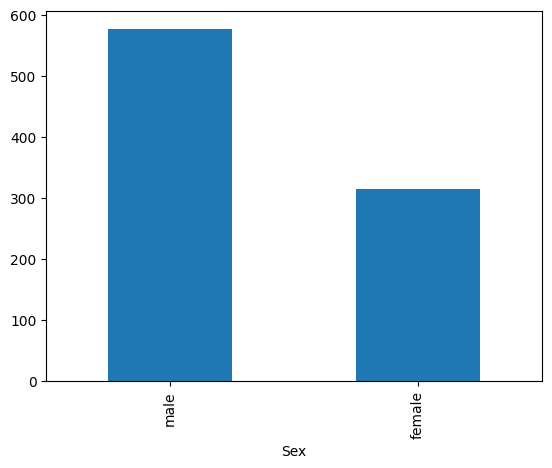

In [7]:
sex_division= train_set['Sex'].value_counts()
print(sex_division)
sex_division.plot(kind = 'bar')

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64


<Axes: xlabel='Sex,Survived'>

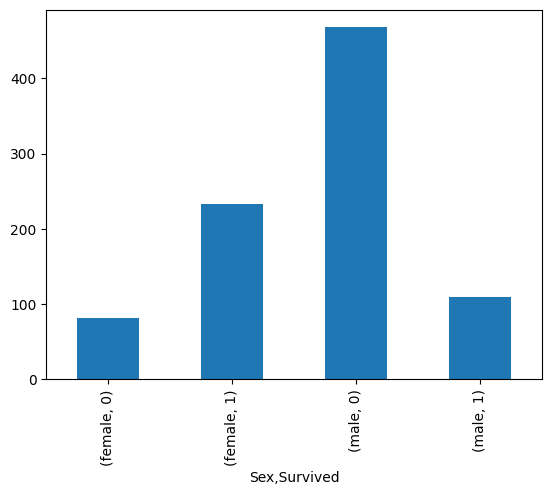

In [8]:
survival_by_gender = train_set.groupby(['Sex', 'Survived']).size()
print(survival_by_gender)
survival_by_gender.plot(kind = 'bar')

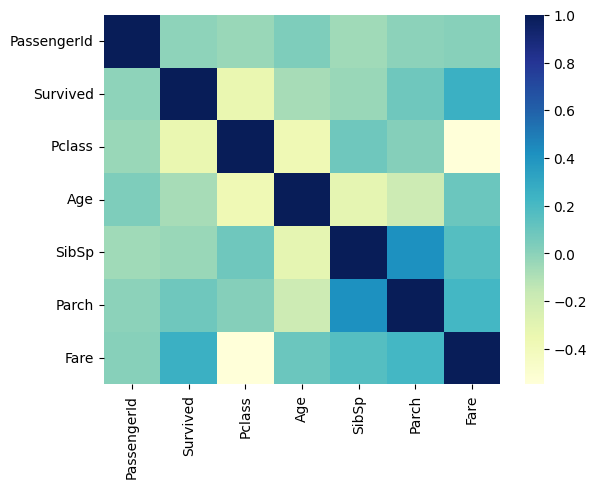

In [9]:
import seaborn as sns
numeric_data = train_set.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), cmap="YlGnBu")
plt.show()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
train_set_split = StratifiedShuffleSplit( n_splits= 1 , test_size= 0.2)
for train_indices , test_indices in train_set_split.split(train_set , train_set[["Survived"]]):
    strat_test_set = train_set.loc[test_indices]
    strat_train_set = train_set.loc[train_indices]

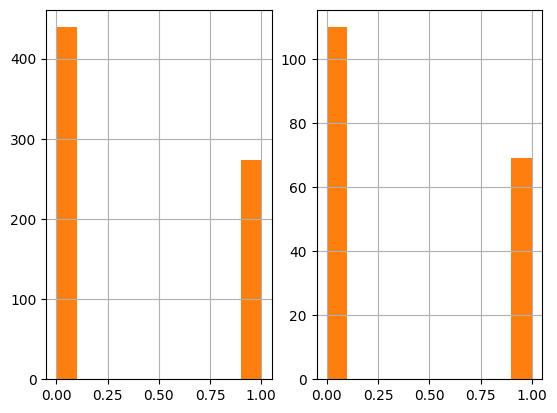

In [11]:
plt.subplot(1 , 2  , 1)
strat_train_set["Survived"].hist()
strat_train_set["Survived"].hist()



plt.subplot(1 , 2  , 2)
strat_test_set["Survived"].hist()
strat_test_set["Survived"].hist()
plt.show()

In [12]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 537 to 877
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          567 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        168 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.median_age = X["Age"].median()
        return self

    def transform(self, X):
        X = X.copy()
        X["Age"] = X["Age"].fillna(self.median_age)
        return X

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.embarked_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        self.sex_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

        self.embarked_encoder.fit(X[['Embarked']])
        self.sex_encoder.fit(X[['Sex']])
        return self

    def transform(self, X):
        X = X.copy()
        n_samples = X.shape[0]

        embarked = self.embarked_encoder.transform(X[['Embarked']])
        sex = self.sex_encoder.transform(X[['Sex']])

        embarked_df = pd.DataFrame(embarked, columns=self.embarked_encoder.get_feature_names_out(['Embarked']), index=range(n_samples))
        sex_df = pd.DataFrame(sex, columns=self.sex_encoder.get_feature_names_out(['Sex']), index=range(n_samples))

        X = X.drop(['Embarked', 'Sex'], axis=1).reset_index(drop=True)
        return pd.concat([X, embarked_df, sex_df], axis=1)


In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        return X.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("encoder", FeatureEncoder()),
    ("imputer", AgeImputer()),
    ("dropper", FeatureDropper()),
])
#earlier there was encoding and the imputation was being done and the old accuracy was 76% 
#after swapping the imputer and the encoder the accutacyuy jumped to 82%

In [42]:
transformed = pipeline.fit_transform(strat_train_set)

In [43]:
transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   712 non-null    int64  
 1   Survived      712 non-null    int64  
 2   Pclass        712 non-null    int64  
 3   Age           712 non-null    float64
 4   SibSp         712 non-null    int64  
 5   Parch         712 non-null    int64  
 6   Fare          712 non-null    float64
 7   Embarked_C    712 non-null    float64
 8   Embarked_Q    712 non-null    float64
 9   Embarked_S    712 non-null    float64
 10  Embarked_nan  712 non-null    float64
 11  Sex_female    712 non-null    float64
 12  Sex_male      712 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 72.4 KB


In [44]:
from sklearn.preprocessing import StandardScaler
X = strat_train_set.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], axis=1)
Y = strat_train_set['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=['int64', 'float64']))  # scale only numeric columns


In [45]:
from sklearn.linear_model import LogisticRegression


X_train_raw = strat_train_set.drop('Survived', axis=1)
y_train = strat_train_set['Survived']

X_test_raw = strat_test_set.drop('Survived', axis=1)
y_test = strat_test_set['Survived']


X_train = pipeline.fit_transform(X_train_raw)
X_test = pipeline.transform(X_test_raw)


model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred)) 


C:\Users\Siddharth Sharma\AppData\Roaming\Python\Python313\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8212290502793296
